In [1]:
import pandas as pd

In [2]:
messages = pd.read_csv('SMSSpamCollection.txt',sep='\t',names = ['label','message'])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#Data Cleaning and Preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Import necessary libraries from NLTK
from nltk.corpus import stopwords  # To access stop words for filtering
from nltk.stem.porter import PorterStemmer  # Import the Porter stemming algorithm

# Create an instance of the PorterStemmer
ps = PorterStemmer()

# Initialize an empty list to store the processed text data
corpus = []

# Iterate over each message in the dataset
for i in range(0, len(messages)):
    # Use regular expressions to replace non-letter characters with spaces
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    
    # Convert the text to lowercase to ensure uniformity
    review = review.lower()
    
    # Split the text into words (tokenization)
    review = review.split()
    
    # Stemming and stopword removal:
    # - Use list comprehension to stem each word using PorterStemmer
    # - Filter out any stopwords using NLTK's list of English stopwords
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    
    # Join the words back into a single string
    review = ' '.join(review)
    
    # Append the processed text to the corpus list
    corpus.append(review)


In [26]:
# Import the CountVectorizer class from scikit-learn, which is used to convert a collection of text documents into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object with max_features parameter.
# max_features=2500 tells the vectorizer to consider only the top 2500 most frequent words. This helps in reducing the dimensionality and focuses on the most relevant features.
cv = CountVectorizer(max_features=2500)

# Apply the CountVectorizer to our 'corpus' (a collection of text data that has been preprocessed)
# fit_transform learns the vocabulary dictionary and returns a matrix of term/document frequency features.
# toarray() converts the matrix returned by fit_transform into a numpy array for ease of use in analysis and machine learning models.
X = cv.fit_transform(corpus).toarray()


In [27]:
X.shape

(5572, 2500)

In [28]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Use pandas get_dummies function to convert categorical variable 'label' into dummy/indicator variables.
# This is typically done for categorical data to be used in machine learning algorithms.
y = pd.get_dummies(messages['label'])

# Select only the second column of the created dummy variable matrix.
# This is commonly used to transform a categorical output into a binary outcome - 2 columns saying ham vs spam and then we select only 'ham' column.
# For a binary classification ('spam' vs 'ham'), the second column alone can represent the presence of one class, 'ham'.
y = y.iloc[:,1].values

# The 'values' attribute will return the values of the DataFrame as a numpy array.
# This conversion is useful for compatibility with many machine learning algorithms in scikit-learn that expect input as numpy arrays.


In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
y

array([False, False,  True, ..., False, False, False])

In [31]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 0)

In [32]:
#Training model using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

y_pred = spam_detect_model.predict(X_test)

y_pred_proba= spam_detect_model.predict_proba(X_test)[:,1]  #Probability of the email being Spam

#Evaluating Model Performance
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("\n Classification Report :\n",classification_report(y_test, y_pred))

Confusion Matrix: 
 [[955   0]
 [156   4]]

 Classification Report :
               precision    recall  f1-score   support

       False       0.86      1.00      0.92       955
        True       1.00      0.03      0.05       160

    accuracy                           0.86      1115
   macro avg       0.93      0.51      0.49      1115
weighted avg       0.88      0.86      0.80      1115



In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8600896860986547

In [36]:
#Visualizing the performance of the classifier
import matplotlib.pyplot as plt
import numpy as np
def plot_cm(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Ham', 'Spam'], rotation=45)
    plt.yticks(tick_marks, ['Ham', 'Spam'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.show()

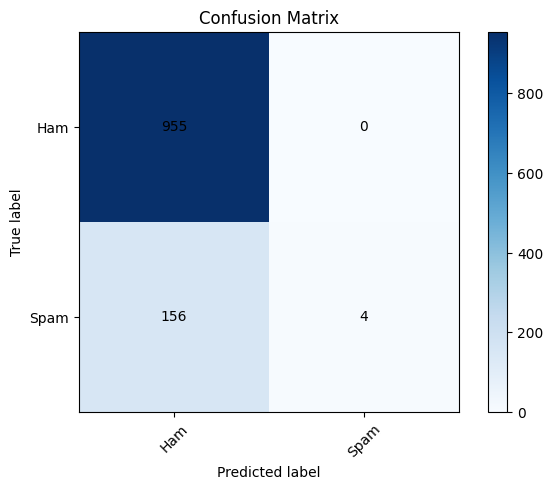

In [40]:
plot_cm(confusion_matrix(y_test,y_pred))